In [2]:
import pandas as pd

In [3]:
df= pd.read_csv("HousingData.csv")
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


df.dtypes tüm tipler numerik

In [4]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [5]:
# bütün boş verileri ort ile doldur
df = df.fillna(df.mean()) # bütün sütunları (boş olanlar) ort ile doldurur

In [6]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
df.to_csv("HousingData_Clean.csv")

In [8]:
!pip install scikit_learn

     ---------------------------------------- 7.1/7.1 MB 1.7 MB/s eta 0:00:00
     -------------------------------------- 302.2/302.2 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 34.1/34.1 MB 1.5 MB/s eta 0:00:00


In [9]:
# denetimli ögrenme -> etiket ve diğer veriler
df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0


In [13]:
X = df.drop(columns=["MEDV"])
y = df["MEDV"]

In [14]:
print(f"x değeri: {X.head(1)}")
print(f"y değeri: {y[0]}")

x değeri:       CRIM    ZN  INDUS  CHAS    NOX     RM   AGE   DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.09    1  296     15.3   

       B  LSTAT  
0  396.9   4.98  
y değeri: 24.0


In [15]:
df.shape

(506, 14)

In [17]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
# random seed_state

In [22]:
X_train.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.210000
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6,432,17.8,393.30,12.715432
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3,233,17.9,396.90,10.210000
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.580000
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.130000


In [ ]:
# dogru algoritma seçerek eğitme

In [26]:
# linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [31]:
# MAE => mean absolute error -> ortalama mutlak sapma (ama sapmaların karesi akınarak)
mae = mean_absolute_error(y_test, y_pred)
mae

3.1410525671084675

In [32]:
# MAE => mean squared error -> ortalaman sapma (ama sapmaların karesi akınarak)
mse = mean_squared_error(y_test, y_pred)
mse

21.818457953526064

In [33]:
import matplotlib.pyplot as plt

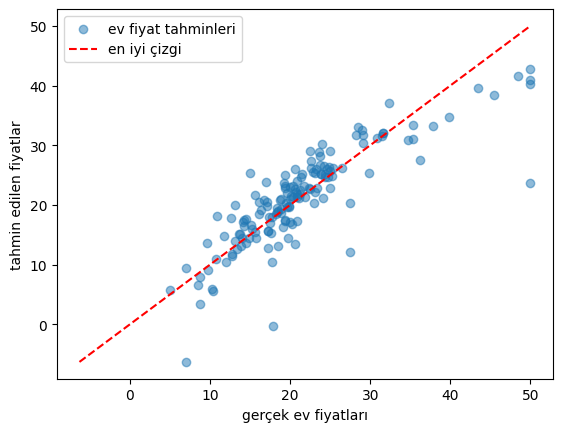

In [36]:
plt.scatter(y_test, y_pred, label="ev fiyat tahminleri", alpha=0.5)
plt.xlabel("gerçek ev fiyatları")
plt.ylabel("tahmin edilen fiyatlar")
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="en iyi çizgi")
plt.legend()

In [38]:
# coef
coef_df = pd.DataFrame(model.coef_, X.columns, columns=["Katsayı"])
coef_df
# CRIM -> -0.12 -> ters orantı yani crim arttıkca fiyat azalır
# ZN -> +0.03 -> düz orantı yani ZN arttıkça fiyat artar

,Katsayı
CRIM,-0.128803
ZN,0.031913
INDUS,-0.010805
CHAS,3.689188
NOX,-13.963873
RM,4.418486
AGE,-0.026106
DIS,-1.432754
RAD,0.196898
TAX,-0.007219


In [39]:
X_test.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,11.083992,0.0,0.51,6.416,68.518519,2.6463,5,296,16.6,395.5,9.04


In [40]:
import numpy as np

In [41]:
new_house_arr = np.array(
[
[1.50, 0.0, 11.083992, 0.0, 1.51, 6.416, 68.518519, 2.6463, 15, 296, 16.6, 395.5, 9.04]
]
)

In [42]:
model.predict(new_house_arr)

C:\Users\deniz\anaconda3\envs\env_1\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([16.7705684])

In [43]:

feature_names = ["CRIM", "ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT" ]
new_house_df = pd.DataFrame(new_house_arr, columns=feature_names)
new_house_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.5,0.0,11.083992,0.0,1.51,6.416,68.518519,2.6463,15.0,296.0,16.6,395.5,9.04
